# Rdionica: priprema datoteke `podaci_upitnik.csv` za obradu

In [1]:
options(repr.matrix.max.cols = 120, repr.matrix.max.rows = 500,
       repr.plot.height = 4, repr.plot.width = 4)

In [ ]:
install.packages(c('tidyverse', 'here',
                   'wrapr', 'conflicted',
                   # ovi paketi nisu učitani tijekom ovog
                   # dijela radionice:
                   'DataExplorer', 'naniar', 'visdat',
                   'skimr', 'janitor', 'psych'))

U ovom dijelu radionice proći ćemo put od sirovih podataka do podataka na kojima možemo provesti analizu.

Prije nego što se bacimo na učitavanje i proučavanje sirovih podataka, učitat ćemo pakete koje ćemo koristiti.

Pakete učitavamo pozivanjem funkcije `library`, koja kao argument prima ime **jednog** paketa.

In [2]:
# skupina paketa koja sadrži većinu paketa koje
# ćemo koristiti za baratanje podacima
library(tidyverse)

# paket koji sadrži 'pipe' operatore
library(magrittr)

# upozorava na konflikte u imenima funkcija
# koji se javljaju kad više paketa koristi isto
# ime
library(conflicted)

# omogućava učitavanje .SAV fielova
library(haven)

# paket koji sadrži neke zgodne olakšice
library(wrapr)

# olakšava korištenje relativnih file pathova
library(here)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.7
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

here() starts at /home/denis/Documents/rdionica


## Učitavanje podatka

Za početak, pogledat ćemo kako izgledaju naši sirovi podaci.

A da bismo to učinili, prvo ih moramo učitati u R.

Vidjet ćemo kako učitati tri vrste datoteka: SPSS-ov `.sav`, Excelov `.xls/xlsx` te generički *comma separated values* file - `.csv`.

### SPSS - .sav

`.sav` datoteke možemo učitati koristeći funkciju `read_sav` iz paketa `haven` (dio `tidyversea`). Funkcija kao argument prima samo put do datoteke koju želimo učitati.

In [5]:
podaci_spss <- read_sav(here('podaci', 'podaci_upitnik.sav'))

Funkcija `here` konstruira relativni put do datoteke `podaci_upitnik.csv`, koji kreće od *root* foldera, a koji je označen prisustvom prazne datoteke imena `.here`.

To je jedan od načina koji osigurava reproducibilnost obrada pri prijenosu koda s jednog računala na drugo i lišava nas muke ručnog mijenjanja puteva do datoteka. Isto postižemo stvaranjem projekta u RStudiju. Osim na datoteku `.here`, funkcija `here` reagira i na datoteke sa sufiksom `.Rproj` (koje nastaju pri stvaranju RStudio projekta).

Kad pogledamo učitane podatke, primjećujemo nešto neobično kod `pi_` varijabli.

In [6]:
head(podaci_spss)

attitudesAndNorms01,attitudesAndNorms02,attitudesAndNorms03,attitudesAndNorms04,attitudesAndNorms05,attitudesAndNorms06,attitudesAndNorms07,attitudesAndNorms08,callToAction,charitableBehavior01,charitableBehavior02,descriptiveSocialNorms01,descriptiveSocialNorms02,descriptiveSocialNorms03,descriptiveSocialNorms04,mf_AuthoritySubversion,mf_CareHarm,mf_FairnessCheating,mf_LoyaltyBetrayal,mf_SanctityDegradation,moralFoundations01,moralFoundations02,moralFoundations03,moralFoundations04,moralFoundations05,moralFoundations06,moralFoundations07,moralFoundations08,moralFoundations09,moralFoundations10,moralFoundations11,moralFoundations12,moralFoundations13,moralFoundations14,moralFoundations15,moralFoundations16,moralFoundations17,moralFoundations18,moralFoundations19,moralFoundations20,moralFoundations21,moralFoundations22,moralFoundations23,moralFoundations24,moralFoundations25,moralFoundations26,moralFoundations27,moralFoundations28,moralFoundations29,moralFoundations30,moralFoundations31,moralFoundations32,moralIdentityInternalization01,moralIdentityInternalization02,moralIdentityInternalization03,moralIdentityInternalization04,moralIdentityInternalization05,pi_age,pi_education,pi_gender,pi_ideology,pi_income,pi_nationality,pi_previousDonations,V65
5,5,5,5,4,3,4,6,7,37,4,4,3,2,2,1,3,3,2,1,4,4,3,1,2,0,4,4,3,0,1,6,3,4,3,3,2,2,0,0,0,4,3,4,0,1,1,0,1,1,3,1,5,2,1,2,3,3,"""Some professional diploma","no degree""",Male,Neither liberal or conservative,Somewhat below the average,American,Rarely
5,4,2,1,2,2,3,7,6,18,3,3,1,3,1,1,3,3,2,1,3,3,0,0,2,0,3,3,3,-1,3,5,5,2,2,1,5,3,2,1,1,4,3,3,0,1,1,-1,1,1,2,0,4,3,1,3,4,20,Master's degree,Male,Very liberal (left),Somewhat above the average,USA,Regularly,
4,6,5,5,3,2,4,5,7,7,3,3,3,2,5,2,3,4,2,1,4,4,2,2,1,0,4,4,2,1,1,4,4,1,2,1,3,3,4,0,1,6,4,1,1,1,0,2,3,1,1,0,6,5,1,1,5,20,High school,Male,Neither liberal or conservative,Somewhat above the average,Turkish,Rarely,
6,2,3,2,2,3,5,6,1,14,5,1,1,2,3,2,3,3,3,1,3,3,1,2,3,2,4,3,4,3,0,5,5,1,1,2,4,4,2,4,1,4,2,5,2,5,1,-1,2,1,5,4,6,4,1,3,4,19,Master's degree,Male,Very liberal (left),Somewhat above the average,United States of America,Rarely,
4,1,2,3,1,2,4,5,8,0,0,3,1,2,4,2,4,2,2,1,3,1,1,2,3,-1,5,3,3,2,1,4,5,3,2,-1,4,5,2,1,3,4,4,2,0,0,1,-1,4,2,2,2,4,3,1,2,4,22,Master's degree,Female,Very liberal (left),Somewhat above the average,US,Regularly,
4,4,4,3,4,3,5,5,7,37,2,1,1,3,2,0,3,4,1,-1,4,4,0,0,-1,1,2,4,3,0,-1,4,3,3,3,1,4,2,2,3,3,3,0,3,3,2,1,1,1,1,2,1,4,6,1,1,4,25,Master's degree,Male,Very liberal (left),Somewhat above the average,USA,Regularly,


Kod nekih sudionika, unos pod `pi_education` je razdvojen u dva stupca, pri čemu je jedna vrijednost nasilno gurnuta u `pi_gender`. To je dovelo i do stvaranja nove varijable `V65`, koja sadrži vrijednosti koje bi se trebale javljati pod `pi_previous donations`. Dakle, kod nekih sudionika su vrijednosti iza `pi_education` pomaknute za jedno mjesto udesno.

Do toga je došlo jer je puni naziv jedne razine varijable `pi_education`: "Some professional diploma, no degree". Zbog zareza u nazivu razine dolazi do pogreške u parsanju varijabli, pa dolazi do pomaka udesno i stvaranja varijable viška.

Ovaj problem lako možemo riješiti tako da otvorimo izvornu bazu podataka i samo napravimo find and replace kako bismo uklonili zarez smutnje. Lako ga je riješiti ako imamo SPSS. Druga opcija je korištenje besplatnog online `.sav` -> `.csv` konvertera (link se nalazi u referencama). Time ćemo dobiti datoteku koju možemo otvoriti u nekom text editoru (recimo, Notepadu), te učiniti potrebne promjene (opet find and replace). Treći način je, naravno, prtljanje po podacima u R-u, što ćemo ostaviti za kraj radionice.

### Excel - .xls(x)

### Comma separated values - .csv

*Comma separeted value* datoteke su točno to što ime kaže - podaci koji su strukturirani kao vrijednosti odvojene zarezima, gdje se svaki unos (na primjer sudionik) nalazi u zasebnom redu, a vrijednosti varijabli koje su uz njega povezane ispisane su redom i odvojene su zarezima.

U prvom redu (koji funkcije u R-u često nazivaju **header**) obično se nalaze imena varijabli, a u ostalim redovima su njihove vrijednosti.

Ovako izgledaju prva dva reda i prvih nekoliko stupaca datoteke `podaci_upitnik.csv`:

```
attitudesAndNorms01,attitudesAndNorms02,attitudesAndNorms03, ...
5,5,5,5,4, ...
```

Podatke u `.csv` formatu možemo učitati pomoću funkcije `read_csv` iz `readr` paketa (koji je automatski učitan kad smo učitali `tidyverse`). Osnovni (base) R ima funkciju `read.csv` koja obavlja isti zadatak, ali neki R developeri preporučuju korištenje `read_csv` funkcije (na primjer, Hadley Wickham i Garret Grolemund: http://r4ds.had.co.nz/import.html).

U skladu s tom preporukom, koristit ćemo `read_csv`. Podatke iz datoteke `podaci_upitnik.csv` možemo učitati ovako:

In [14]:
podaci <- read_csv(file = here('podaci', 'podaci_upitnik.csv'))

Parsed with column specification:
cols(
  .default = col_integer(),
  pi_education = col_character(),
  pi_gender = col_character(),
  pi_ideology = col_character(),
  pi_income = col_character(),
  pi_nationality = col_character(),
  pi_previousDonations = col_character()
)
See spec(...) for full column specifications.


Poruka koju dobivamo obavještava nas o tome kako su određene varijable reprezentirane. Vidimo da su varijable koje počinju s `pi` reprezentirane kao `character`. Ako pozovemo funkciju `spec`, vidjet ćemo specifikacije svih varijabli.

Budući da pozivanjem funkcije `str` zapravo dobivamo manje-više iste podatke, pozvat ćemo samo nju. Njen output pomoći će nam da vidimo jesu li podaci reprezentirani onako kako bismo očekivali.

In [18]:
str(podaci)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	100 obs. of  65 variables:
 $ attitudesAndNorms01           : int  5 5 4 6 4 4 6 4 3 5 ...
 $ attitudesAndNorms02           : int  5 4 6 2 1 4 0 4 7 7 ...
 $ attitudesAndNorms03           : int  5 2 5 3 2 4 3 5 6 7 ...
 $ attitudesAndNorms04           : int  5 1 5 2 3 3 3 7 5 6 ...
 $ attitudesAndNorms05           : int  4 2 3 2 1 4 2 4 4 6 ...
 $ attitudesAndNorms06           : int  3 2 2 3 2 3 3 3 3 4 ...
 $ attitudesAndNorms07           : int  4 3 4 5 4 5 6 4 4 5 ...
 $ attitudesAndNorms08           : int  6 7 5 6 5 5 7 5 3 5 ...
 $ callToAction                  : int  7 6 7 1 8 7 11 8 3 7 ...
 $ charitableBehavior01          : int  37 18 7 14 0 37 33 29 16 6 ...
 $ charitableBehavior02          : int  4 3 3 5 0 2 4 3 2 3 ...
 $ descriptiveSocialNorms01      : int  4 3 3 1 3 1 2 4 3 4 ...
 $ descriptiveSocialNorms02      : int  3 1 3 1 1 1 2 3 3 5 ...
 $ descriptiveSocialNorms03      : int  2 3 2 2 2 3 3 4 4 5 ...
 $ descriptiveSocialNorms04

Obrisat ćemo specifikacije varijabli da ne zakrčuju output.

`attr` nam omogućuje da pristupimo raznim **atributima** objekata u R-u. Ovdje, dakle, pristupamo atributu `spec` objekta `podaci`, te ga brišemo upisujući vrijednost `NULL`.

In [4]:
attr(podaci, 'spec') <- NULL

Funkcije `head` i `tail` omogućuju nam da na brzinu vidimo (po defaultu) prvih 6 odnosno posljednjih 6 redova tablice.

In [ ]:
head(podaci)

In [ ]:
tail(podaci, 3)

Ove funkcije pomažu nam pri pregledavanju strukture podataka i njihovih sirovih vrijednosti.

Osnovnu deskriptivnu statistiku možemo dobiti pomoću generičke funkcije `summary`. Generičke funkcije primaju objekte različitih tipova, a njihov output ovisi o tipu objekta. Primjerice, ako u `summary` stavimo `data.frame`, dobit ćemo grubu deskriptivnu statistiku njegovih stupaca. Ako u funkciju stavimo regresijski model, dobit ćemo informacije o modelu.

Dobro je znati i za funkciju `describe` iz paketa `psych`, koja daje dosta detaljniju deskriptivnu statistiku numeričkih varijabli.

Idemo vidjeti output tih dviju funkcija kad u nju stavimo neke numeričke i neke kategorijalne (`factor`) stupce iz našeg `data.framea` `podaci`.

In [ ]:
summary(podaci[, wrapr::qc(attitudesAndNorms01, pi_education, pi_gender)])

Vidimo tri stvari: (1) `summary` nije pretjerano koristan za varijable koje su tipa `character` i (2-3) pojavili su se nova sintaksa i nova funkcija.

`qc` je funkcija iz paketa `wrapr` koja nas oslobađa pisanja navodnika pri korištenju funkcije `c`. `qc` je, dakle, *quoted combine*.

Korištenjem `::` sintakse označili smo da je funkcija `qc` iz paketa `wrapr`. Pri pozivanju funkcija iz paketa **nije nužno** pisati `::`; to smo vidjeli kod pozivanja funkcije `read_csv` iz paketa `readr`.

Ipak, važno je znati tu sintaksu iz dva razloga.

Prvo, korištenjem `::` možemo pozvati funkciju iz paketa koji prethodno nismo učitali (što ćemo vidjeti pri pozivanju funkcije `describe`).

Drugo, u slučaju da dva paketa imaju funkcije koje se jednako zovu, `::` nam omogućava da specificiramo koju funkciju želimo pozvati. Budući da smo učitali paket `conflicted`, R će nas upozoriti ako dođe do konflikta te nas tražiti da specificiramo koju funkciju hoćemo pozvati, koristeći `::`.

Iskoristit ćemo trenutak i upoznati se s još jednom zgodnom funkcijom za dobivanje deskriptivnih podataka: `skim`. Radi preglednosti, probrat ćemo par varijabli različitih tipova.

Nastavit ću koristiti `::` notaciju tako da bude jasno iz kojeg paketa dolazi koja funkcija (osim ako je spomenuto u tekstu ili ako je funkcija iz base R-a).

In [77]:
print(skimr::skim(podaci[, qc(pi_education, attitudesAndNorms01,
                              attitudesAndNorms02, attitudesAndNorms03,
                              mf_CareHarm, pi_income)]))

Skim summary statistics
 n obs: 100 
 n variables: 6 

── Variable type:factor ────────────────────────────────────────────────────────
     variable missing complete   n n_unique                         top_counts
 pi_education       0      100 100        6 bac: 32, mas: 24, hi-: 23, pro: 19
    pi_income       0      100 100        5  avg: 47, avg: 19, avg: 17, avg: 9
 ordered
   FALSE
    TRUE

── Variable type:integer ───────────────────────────────────────────────────────
            variable missing complete   n mean   sd p0 p25 p50 p75 p100
 attitudesAndNorms01       0      100 100 5.04 1.43  2   4   5   6    8
 attitudesAndNorms02       0      100 100 3.22 2.03 -2   2   3   5    7
 attitudesAndNorms03       0      100 100 3.06 1.88 -2   2   3   4    8
     hist
 ▁▃▅▇▁▇▃▁
 ▂▂▃▇▇▇▆▆
 ▁▁▁▇▂▂▁▁

── Variable type:numeric ───────────────────────────────────────────────────────
    variable missing complete   n mean   sd   p0  p25 p50  p75 p100     hist
 mf_CareHarm       0      100 1

Na kraju, pogledat ćemo output funkcije `describe` na tim istim varijablama.

In [78]:
podaci %>%
dplyr::select(attitudesAndNorms01:attitudesAndNorms03,
              mf_CareHarm, pi_income, pi_education) %>%
psych::describe(.)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
attitudesAndNorms01,1,100,5.040000,1.4278613,5.0,5.062500,1.4826,2.000000,8,6.000000,-0.19314719,-0.5916736,0.14278613
attitudesAndNorms02,2,100,3.220000,2.0279860,3.0,3.275000,1.4826,-2.000000,7,9.000000,-0.16760327,-0.4693100,0.20279860
attitudesAndNorms03,3,100,3.060000,1.8846536,3.0,3.050000,1.4826,-2.000000,8,10.000000,0.02193442,0.1236832,0.18846536
mf_CareHarm,4,100,3.543333,0.6381177,3.5,3.522917,0.4942,2.166667,5,2.833333,0.25163049,-0.3440728,0.06381177
pi_income*,5,100,3.300000,1.1236664,4.0,3.362500,1.4826,1.000000,5,4.000000,-0.55822972,-0.7121800,0.11236664
pi_education*,6,100,4.100000,1.6545011,5.0,4.137500,1.4826,1.000000,6,5.000000,-0.09141116,-1.6597342,0.16545011


I dalje nije korisno za `character` varijable, ali omogućava digresiju u svijet pipa.

## Pipe

Pipe su posebni operatori iz `magrittr` paketa. One omogućavaju kraće i, često, razumljivije pisanje koda.

Pipa uzima output izraza sa svoje lijeve strane i daje ga kao argument funkciji na svojoj desnoj strani.

Osnovna pipa je `%>%`. Ona se nalazi i u paketu `dplyr` (koji se učitava kad učitamo `tidyverse`) i u paketu `magrittr`. Posebno smo učitali `magrittr` jer s njim dolaze i neke pipe kojih nema u `dplyru`.

Sad ćemo proći kroz pipe koje `magrittr` nudi.

### %>%

Kao što je rečeno, ovo je osnovna pipa. Ona uzima output izraza s lijeve strane i koristi ga kao input za izraz s desne strane.

Dakle:

In [ ]:
(2 + 2) %>% sqrt(.)

(2 + 2) %>% sqrt()

(2 + 2) %>% sqrt

sqrt(2 + 2)

Trenutačno ne izgleda kao neka ušteda, što je u redu. Kasnije ćemo vidjeti primjere u kojima su pipe dosta zgodnije.

Kod korištenja pipa, `.` označava output iz funkcije s lijeve strane. Po defaultu, pipa će točku staviti na mjesto prvog argumenta. Takav default uglavnom jako dobro funkcionira s funkcijama iz `tidyversea` jer one imaju dosta uniformnu sintaksu, koja je prilagođena za pipe.

Ipak, nekad takvo ponašanje nije poželjno. Pokušajmo grafirati dva brojčana vektora - jedan od njih ćemo spremiti u varijablu, a drugi ćemo direktno dati pipi.

In [ ]:
# ova vrijednost treba ići na x os
x <- 1:10

# vektor koji ćemo sad stvoriti treba ići na y os
# ovaj kod jednak je ovom -> 11:20 %>% plot(., x)
# plot je također generička funkcija
11:20 %>% plot(x)

Vidimo da je pipa stavila svoje vrijednosti na prvo mjesto, a time i na x os. Da bismo spriječili takvo defaultno ponašanje pipe, izraz s desne strane možemo staviti u vitičaste zagrade (`{}`).

In [ ]:
11:20 %>% {plot(x, .)}

Sad ćemo `x` staviti u `data.frame` i pridružiti mu `y`.

In [ ]:
za_graf <- data.frame(x = 1:10, y = 11:20)

str(za_graf)

Ponovno ćemo pokušati plotati vrijednosti tako što `za_graf` stavimo u pipu.

In [ ]:
za_graf %>% plot(.)

Da bismo zamijenili osi, možemo učiniti sljedeće:

In [ ]:
za_graf %>% plot(.$y, .$x)

To jest, ne možemo jer se gornji kod interpretira kao
```
za_graf %>% plot(., .$y, .$x)
```

Dakle, ponovno možemo izraz s desne strane opkoliti vitičastim zagradama.

In [ ]:
za_graf %>% {plot(.$y, .$x)}

Da se smanje takve konfuzije, neki preporučuju da se `.` uvijek piše, tako da je to praksa koju ćemo ovdje usvojiti.

No, osim zatvaranja izraza s desne strane u zagrade, možemo iskoristiti jednu drugu pipu.

### %$%

`%$%` je *variable exposition* pipa. Ona nam daje direktan pristup varijablama koje se nalaze u objektu kojim baratamo.

Gornji problem mogli bismo riješiti i ovako:

In [ ]:
za_graf %$% plot(y, x)

Možemo kombinirati različite pipe. Na primjer:

In [ ]:
1:10 %>% data.frame(a = ., b = 11:20) %$% plot(b, a)

U gornjem primjeru bi nam možda bilo zgodno da možemo pogledati strukturu `data.framea` nakon što ga stvorimo ili napraviti još neke operacije nakon što plotamo varijable.

Na sreću, imamo pipu i za to.

### %T>%

T-pipa (izvorno *tee*) vraća izraz s lijeve strane umjesto izraza s desne strane. Zbog toga, možemo učiniti sljedeće:

In [ ]:
1:10 %>% data.frame(a = ., b = 11:20) %T>% str(.) %$% plot(b, a)

In [ ]:
1:10 %>% data.frame(a = ., b = 11:20) %T>%
{plot(.$b, .$a)} %$%
sum(a,b)

Preostaje nam još jedna pipa...

### %<>%

`%<>%` je *assignment* pipa. Ona istovremeno daje vrijednost s lijeve strane za argument i piše u nju. To nam omogućuje da neku varijablu provučemo kroz seriju transformacijskih koraka i da te transformacije odmah pohranimo.

In [ ]:
za_graf$x %<>% magrittr::add(., 2) %>%
magrittr::multiply_by(., 2) %>% sqrt(.)

str(za_graf)

Ovime završavamo upoznavanje s pipama. Nakratko se vraćamo natrag na primjer s funkcijom `describe`, nakon čega ponovno odlazimo u uzbudljivu digresiju.

## dplyr::select i dplyr::filter

Već smo ranije vidjeli funkciju `select`, koja nam je omogućila da izaberemo 3 od 64 stupca iz `data.framea` `podaci`. Za odabiranje pojedinih redova koji zadovoljavaju određeni logički izraz možemo koristiti funkciju `filter`.

Sad ćemo prikazati deskriptivnu statistiku za pitanja koja tvore jednu od skala koja se nalazi u našim podacima - skalu internalizacije moralnog identiteta - samo na poduzorku žena.

Sve varijable koje se odnose na tu skalu imaju ime oblika `moralIdentityInternalization<broj-pitanja>`. Zbog tog sustavnog imenovanja, ne moramo ispisivati imena (ili redne brojeve) svih varijabli koje želimo zahvatiti funkcijom `describe`, nego možemo pozvati funkciju `contains` unutar funkcije `select`.

`contains` na omogućuje da odaberemo samo one varijable koje sadrže zadani string.

In [ ]:
podaci %>%
dplyr::filter(., pi_gender == 'Female') %>%
dplyr::select(., contains('internal', ignore.case = T)) %T>% str(.) %>%
psych::describe(.)

In [ ]:
# base R rješenje za usporedbu
psych::describe(podaci[podaci$pi_gender == 'Female', qc(moralIdentityInternalization01,
                                                moralIdentityInternalization02,
                                                moralIdentityInternalization03,
                                                moralIdentityInternalization04,
                                                moralIdentityInternalization05)])

`contains` je jedna od nekoliko pomoćnih funkcija koje su super za `select`. Druge su:
- `starts_with`, koja odabire varijable koje počinju s određenim stringom
- `ends_with`, isto, samo za kraj
- `one_of`, koju treba koristiti kad `selectu` dajemo `character` vektor
- `matches`, koji nam omogućava da odaberemo varijable čija imena odgovaraju nekom **regularnom izrazu**

## Regularni izrazi

Regularni izrazi (eng. *regular expressions*, *regex* ili *regexp*) su stringovi koji označavaju neki uzorak za pretraživanje. Na primjer, sve ove izraze
```
string
striing
striiing
striiiiiiiiiiiiiiiiing
```
možemo opisati stringom `stri*ng`. Znak `*` (asterisk) je **kvantifikator** koji označava *nula ili više ponavljanja prethodnog znaka*. To znači da bi taj regularni izraz pronašao i string `strng`.

Uz razne kvantifikatore, postoje još i klase znakova te meta-znakovi koji nam omogućavaju lako pretraživanje stringova.

Regexi su implementirani u base R-u (npr. funkcije `grep` i `grepl`) i u `tidyverseu` kroz paket `stringr`. Mi ćemo se baviti `stringrom`. Budući da postoje razne implementacije regularnih izraza, koje se razlikuju po kompleksnosti, bitno je znati da `stringr` koristi **Perl/PCRE** regularne izraze.

U ovom dijelu ćemo pogledati osnove regularnih izraza, koje ćemo nadograđivati kroz ostatak radionice.

### Kvantifikatori

#### *

Kao što je već rečeno, `*` označava **0 ili više** ponavljanja **znaka** koji mu prethodi. *Znak* se ovdje odnosi na doslovni znak, na klasu znakova ili na grupu znakova. S klasama i grupama ćemo se upoznati malo kasnije.

Pogledat ćemo output funkcije `str_detect` koja kao input uzima string (ili više njih) i regularni izraz (`pattern`), a vraća `TRUE` ili `FALSE` ovisno o tome nalazi li se regularni izraz u stringu ili ne.

In [ ]:
stringr::str_detect(string = qc(kobilaaaa, maajka, celer), pattern = 'a*') %>% print

#### +

`+` označava **jedno (1) ili više** ponavljanja prethodnog znaka/klase znakova/grupe znakova.

Da vidimo što će nam vratiti funkcija `str_extract_all` koja prima iste argumente kao i `str_detect`, a vraća sve pronađene `patterne`.

In [ ]:
stringr::str_extract_all(string = qc(kobilaaaa, maajka, celer), pattern = 'a+') %>% print

Postoji i funkcija `str_extract` koja vraća **samo prvi** pronađeni uzorak.

In [ ]:
stringr::str_extract(qc(kobilaaaa, maajka, celer), 'a+') %>% print

Također, možemo vidjeti da `str_detect` više ne vraća `TRUE` za posljednju riječ.

In [ ]:
stringr::str_detect(qc(kobilaaaa, maajka, celer), 'a+') %>% print

#### ?

Upitnik označavao **0 ili jedno (1)** ponavljanje.

In [ ]:
qc(kobilaaaa, maajka, celer) %>%
stringr::str_extract_all(., 'a?') %>%
print

#### {n,m}

Ova sintaksa nam omogućava da specificiramo koliko ponavljanja želimo. Postoje tri valjane kombinacije:
- `{n,m}` znači od `n` do `m`
- `{n,}` znači `n` ili više
- `{n}` znači točno `n`

`{,m}` **nije valjan** regularni izraz! Također, bitno je da nema razmaka između `n` ili `m` i zareza.

Budući da je ovo posljednji kvantifikator, vratit ćemo se na početni primjer.

In [ ]:
qc(string, striing, striiing, striiiiiiiiiiiiiiiiing) %>%
stringr::str_extract_all(., 'i{2,5}') %>% print

In [ ]:
qc(string, striing, striiing, striiiiiiiiiiiiiiiiing) %>%
stringr::str_extract_all(., 'i{3,}') %>% print

In [ ]:
qc(string, striing, striiing, striiiiiiiiiiiiiiiiing) %>%
stringr::str_extract_all(., 'i{17}') %>% print

### Klase znakova

Pretraživanja koja smo dosad vidjeli su jednostavna i jako umjetna. U stvarnim primjenama uglavnom nećemo pokušavati uhvatiti jedno slovo, nego znakove određenog tipa (kao što su brojke) ili određene skupine znakova (npr. brojeve 1, 7 ili 5). U te svrhe, koristimo **klase znakova**.

NB: Klase znakova predstavljaju više mogućih znakova, ali **samo jedno mjesto**.

Napravit ćemo mali `data.frame` koji se sastoji od dva stupca koja sadrže stringove.

In [ ]:
# ne možemo koristiti qc za mjesta zbog razmaka
data.frame(mjesta = c('Slavonski Brod', 'BJELOVAR', 'Cista Provo', 'Banova Jaruga'),
           tablice = qc(SB1152KF, BJ302LD, CP999LO, BN2001KA)) -> registracije

Za početak, pokušat ćemo pronaći sve unose koji se sastoje od dvije riječi (to znači da ćemo isključiti BJELOVAR `:(`). Vidimo da sva mjesta koja se sastoje od dvije riječi imaju sljedeći uzorak: `[veliko slovo][nekoliko malih slova][razmak][veliko slovo][nekoliko malih slova]`. Koristeći regexe, možemo napraviti sljedeće:

In [ ]:
registracije$mjesta %>%
stringr::str_detect(., '^[[:upper:]][[:lower:]]+\\s[[:upper:]][[:lower:]]+')

`^` (eng. *caret*) je meta-znak koji označava **početak stringa**. `[[:upper:]]` i `[[:lower:]]` su klase koje označavaju velika odnosno mala slova. `\\s` označava razmak (ostavljanje praznog mjesta također funkcionira). Dakle, obrazac koji tražimo mora počinjati s velikim slovom kojem slijedi jedno ili više malih slova.

Drugi važan meta-znak je `$`, koji označava **kraj stringa**.

NB: Ako želimo tražiti same meta-znakove (npr. u `$1551`), ispred njih moramo staviti `\\` (backslash x 2). Taj čin se zove *escaping*.

In [ ]:
c('$alaj', '€broj') %>%
stringr::str_detect(., '\\$')

Koristeći uglate zagrade, možemo sami definirati klasu znakova koja je prihvatljiva na nekom mjestu. Na primjer, možemo tražiti sva mjesta koja imaju dvije riječi i čija prva riječ počinje slovom B (velikim!) ili S (također!). Ovdje ćemo koristiti `str_subset`, koja vraća stringove koji sadrže zadani obrazac.

In [ ]:
registracije$mjesta %>%
stringr::str_subset(., '^[SB][[:lower:]]+\\s[[:upper:]][[:lower:]]+')

Možemo definirati i custom klasu znakova koji se **ne smiju** nalaziti na nekom mjestu. To radimo tako da na početak svoje klase stavimo znak `^` (`[^...]`). Na primjer, možemo tražiti stringove koji imaju dvije riječi, a čija prva riječ ne počinje slovom S ili B:

In [ ]:
registracije$mjesta %>%
stringr::str_subset(., '^[^SB].*')

Točka je poseban znak u regularnim izrazima, a označava **bilo koji znak** (osim novog reda, što se u R-u označava s `\\n`). Budući da označava bilo što, `.` se zove *wildcard*.

Klasa znakova ima razmjerno puno, pa ćemo spomenuti još jednu koja se često javlja. Pokušat ćemo izvući samo one registracijske oznake (`tablice`) koje imaju tri znamenke.

In [ ]:
registracije$tablice %>%
stringr::str_subset(., '[[:upper:]]{2}\\d{3}[[:upper:]]')

`\\d`, dakle, označava znamenke.

Zasad ćemo proći još samo kroz grupe znakova.

### Grupe znakova

Znakove možemo grupirati koristeći obične zagrade (`(...)`). Grupe spajaju znakove u jednu cjelinu. To nam, primjerice, omogućuje da ponavljajuće uzorke lako kvantificiramo.

Na primjer, zamislimo da želimo izvući određene vrste smjehova iz nekih stringova.

In [ ]:
qc(hehehe, hehehohohehe, hahahahihi) %>%
stringr::str_extract_all(., '(ha|he){2}') %>%
print(.)

Ovdje smo iskoristili i znak `|` (kod mene se nalazi na `CTRL-W` i zove se *pipe*), koji označava alternaciju, odnosno logičko ILI. Dakle, tražimo dva ponavljanja stringa `ha` ili dva ponavljanja stringa `he`.

NB: Ne stavljati razmake oko alternatora jer će se to tumačiti kao razmak koji treba tražiti u stringu!

Time završavamo digresivne tokove i bacamo se na borbu s podacima.

## Nastavak pripreme podataka

Zasad smo pogledali strukturu podatka (`str`), kako izgledaju sirovi podaci (`head` i `tail`) te neke statističke sažetke (`describe` i `summary`).

Sad ćemo se baciti na formatiranje sirovih podataka u nešto što nam je zgodnije za rad.

Prvo ćemo se prisjetiti strukture podatka kojima baratamo.

In [ ]:
str(podaci)

Za početak, iskoristit ćemo moći opažanja i primijetiti da su varijable koje počinju s `pi` (osim `pi_age`) spremljene kao `character` vektori. Taj tip vrijednosti nije zgodan za većinu obrada koje bismo htjeli raditi i razlog je zašto nam `summary` vraća nekoristan sažetak.

### Baratanje kategoričkim varijablama

Stoga, pretvorit ćemo te varijable iz `charactera` u `factore`.

Varijable možemo modificirati koristeći `mutate` obitelj funkcija. Ovdje ćemo iskoristiti `mutate_at`, koji nam omogućuje da specificiramo varijable na koje želimo primijeniti neku funkciju.

Uhvatit ćemo sve `pi` varijable osim `pi_age` te na njih primijeniti funkciju `as.factor`, koja će ih pretvoriti u `factore`.

Budući da će `mutate_at` funkciju primijeniti na postojeće stupce, dobro je prvo (a) biti siguran da biramo prave stupce i (b) biti siguran da radimo ono što želimo napraviti prije nego spremimo promjene.

(a) ćemo riješiti koristeći `colnames` i `select`.

In [ ]:
podaci %>%
dplyr::select(., pi_education:pi_previousDonations) %>%
colnames

Vidimo da ciljamo ispravne stupce. Sad možemo eksperimentirati s `mutate_at`.

In [ ]:
podaci %>%
dplyr::mutate_at(., .vars = vars(pi_education:pi_previousDonations),
                .fun = as.factor) %>%
dplyr::select(., pi_education:pi_previousDonations) %>%
str

In [5]:
podaci %<>%
dplyr::mutate_at(., .vars = vars(pi_education:pi_previousDonations),
                .fun = as.factor)

In [ ]:
str(podaci)

Ako sad pozovemo `summary`, dobit ćemo korisnije rezultate.

In [ ]:
podaci %>%
dplyr::select(., starts_with('pi_'), -pi_age) %>%
summary(.)

Gledajući output ove funkcije, primjećujemo da su pojedine vrijednosti prilično dugačke (npr. Some professional diploma, no degree).

Koristeći `forcats` paket (dio `tidyversea`), vrlo lako možemo rekodirati te vrijednosti. Za početak, da bismo si uskratili nešto tipkanja, možemo pozvati funkciju `dput` kako bismo dobili reprezentaciju razina faktora koju možemo kopipejstati.

In [ ]:
podaci$pi_education %>% levels(.) %>% dput(.)

In [ ]:
podaci$pi_education %>%
head(., 10) %T>% print(.) %>%
forcats::fct_recode(., 'elem-sch' = "Elementary School", 'hi-sch' = "High school",
                    'masters' = "Master's degree", 'phd' = "PhD or higher", 
                    'prof-dip' = "Some professional diploma, no degree", 
                    'bac' = "The baccalaureate") %>% print(.)

Kratko pojašnjenje: uzimamo samo varijablu `pi_education` te prvih 10 unosa (`head`). Usput pozivamo `print` (s T-pipom!) kako bismo ispisali izvornih 10 vrijednosti. Varijablu s tih 10 vrijednosti šaljemo u `fct_recode`, gdje rekodiramo razine. Naposljetku, pozivamo `print` kako bismo ispisali nove vrijednosti (`print` ovdje nije potreban, tu je samo zato da bi se output izjednačio onom koji dobivamo nakon prvog poziva; to je specifičnost Jupyter Notebooka).

Sad kad smo zadovoljni outputom, možemo maknuti nepotrebne dijelove i upisati promjenu.

In [6]:
podaci$pi_education %<>%
forcats::fct_recode(., 'elem-sch' = "Elementary School", 'hi-sch' = "High school",
                    'masters' = "Master's degree", 'phd' = "PhD or higher", 
                    'prof-dip' = "Some professional diploma, no degree", 
                    'bac' = "The baccalaureate")

In [ ]:
levels(podaci$pi_education)

Isto ćemo napraviti s varijablom `pi_income`.

In [ ]:
podaci$pi_income %>% levels(.) %>% dput(.)

Ovdje možemo primijetiti da je redoslijed razina podosta besmislen, tako da ćemo ih izvrtiti tako da idu od najniže do najviše.

Zahvaljujući pipama, sve možemo napraviti u jednom koraku.

In [ ]:
podaci$pi_income %>%
tail(., 10) %T>% print(.) %>%
forcats::fct_recode(., 'avg' = "About the average",
                    'avg++' = "Much above the average",
                    'avg--' = "Much below the average", 
                    'avg+' = "Somewhat above the average",
                    'avg-' = "Somewhat below the average") %>%
# redoslijed razina možemo mijenjati koristeći fct_relevel
forcats::fct_relevel(., 'avg--', 'avg-', 'avg', 'avg+', 'avg++') %>%
# još ćemo faktor pretvoriti u ordered
factor(., ordered = T) %>%
tail(., 10) %>% print(.)

Vidimo da smo pogodili, pa ćemo maknuti nepotrebne dijelove koda i spremiti promjene.

In [7]:
podaci$pi_income %<>%
forcats::fct_recode(., 'avg' = "About the average",
                    'avg++' = "Much above the average",
                    'avg--' = "Much below the average", 
                    'avg+' = "Somewhat above the average",
                    'avg-' = "Somewhat below the average") %>%
forcats::fct_relevel(., 'avg--', 'avg-', 'avg', 'avg+', 'avg++') %>%
factor(., ordered = T)

In [ ]:
str(podaci$pi_income)

Nećemo prolaziti kroz rekodiranje svih faktora, ali hoćemo proći kroz rekodiranje nacionalnosti, zato jer nam to daje mogućnost da se igramo sa stringovima i regularnim izrazima.

### Kodiranje nacionalnosti (pitanje otvorenog tipa)

Pitanje o nacionalnosti bilo je otvorenog tipa, tako da ista nacionalnost može biti reprezentirana na različite načine.

In [ ]:
podaci$pi_nationality %>% head(.)

Već u prvih 6 unosa vidimo da se javljaju "US", "USA", "United States of America" te "American", što sve označava istu nacionalnost. Koristeći regularne izraze i funkciju `case_when`, lako možemo grupirati različite unose.

Za početak, iskoristit ćemo funkciju `tolower` kako bismo sve stringove pretvorili u mala slova (tako da ne moramo paziti na to da su "american" i "American" različiti unosi) te funkciju `str_trim`, koja će ukloniti razmake s početka i kraja stringova (jer je moguće da je netko unio "American", a netko "American ").

In [8]:
podaci$pi_nationality %<>% tolower(.) %>% stringr::str_trim(.)

In [ ]:
head(podaci$pi_nationality)

Ok. Za početak, možemo pozvati `table` da dobijemo pregled frekvencija po faktorima, te `sort` kako bismo ih poredali od najučestalijih do najrjeđih.

In [ ]:
table(podaci$pi_nationality) %>% sort(., decreasing = T)

Budući da ovdje imamo samo 100 sudionika i razmjerno malo različitih nacionalnosti, rekodiranje je lako.

Za kodiranje nacionalnosti koristit ćemo funkciju `case_when`, koja nam omogućuje da specificiramo neki logički izraz (dakle, nešto što kao rezultat vraća `TRUE` ili `FALSE`) i akciju koju treba napraviti u `TRUE` slučaju.

`case_when` za argumente prima logičke izraze i akcije odvojene tildom (`~`), pa pozivanje funkcija izgleda ovako:

```
case_when(logički-izraz ~ akcija-ako-TRUE,
          logički-izraz-2 ~ akcija-ako-TRUE-2)
          ```

In [ ]:
podaci$pi_nationality %>%
# case_when moramo obaviti u {} jer inače dobijemo error
{dplyr::case_when(stringr::str_detect(., 'usa?|american|united states.*|\\w+ americ') ~ 'american',
           str_detect(., 'dutch|french') ~ 'fr-nl',
           str_detect(., 'seychelles|turkish|white') ~ 'other',
           # akciju u svim nespecificiranim slučajevima određujemo
           # tako da stavimo TRUE ~ akcija. ovdje kao akciju stavljamo
           # točku, što znači da taj unos treba ostaviti onakvim
           # kakav je
           TRUE ~ .)} %>% table(.)

In [9]:
podaci$pi_nationality %<>%
{dplyr::case_when(stringr::str_detect(., 'usa?|american|united states.*|\\w+ americ') ~ 'american',
           str_detect(., 'dutch|french') ~ 'fr-nl',
           str_detect(., 'seychelles|turkish|white') ~ 'other',
           TRUE ~ .)} %>%
as.factor(.)

### Mijenjanje imena varijabli

Nekad su imena varijabli jako nezgrapna, neinformativna, mutava i slično. Budući da ćete se prije ili poslije susresti s takvim imenima, proći ćemo kroz nekoliko načina za mijenjanje imena varijabli.

Ako želimo promijeniti imena manjeg broja varijabli, možemo koristiti funkciju `rename`. Na primjer, varijable `charitableBehavior01` i `charitableBehavior02` ne govore ništa o tome što su. Jedna je namjera doniranja novca, a druga namjera doniranja vremena. Stoga, preimenovat ćemo ih u `donationMoney` i `donationTime`.

In [10]:
podaci %<>%
dplyr::rename(., donationMoney = charitableBehavior01,
      donationTime = charitableBehavior02)

Ako trebamo preimenovati veći broj varijabli i ako smo te sreće da njihova imena možemo uhvatiti regularnim izrazima, možemo koristiti `str_replace`.

Na primjer, imamo 32 varijable koje se zovu `moralFoundationsXX` i koje predstavljaju pitanja na Moral Foundations Questionnaireu. MFQ se sastoji od 5 faktora (authority, care, loyalty, fairness, sanctity) - svaki faktor reprezentiran je sa 6 pitanja. Osim toga, ima i dvije kontrolne čestice.

Preimenovat ćemo varijable tako da na kraj imena svake od njih dodamo oznaku faktora kojoj pripada. Za to ćemo koristiti funkciju `str_replace`, koja nam omogućuje da neki obrazac definiran regexom zamijenimo nekim drugim stringom.

In [ ]:
qc(orahovica, orašar) %>%
stringr::str_replace(., 'ora(h|š)', 'bor')

Sad ćemo vidjeti kako ovu funkciju možemo koristiti za preimenovati varijable.

In [ ]:
# dohvaćamo imena stupaca
colnames(podaci) %>%
# specificiramo stupce na kojima želimo izvršiti zamjenu
stringr::str_replace(., pattern = '(moralFoundations)(01|07|12|17|23|28)',
                     replacement = '\\1\\2_care') %>%
# ovo je samo radi prikazivanja svih MFQ pitanja
stringr::str_subset(., 'moralFoundations') %>% print(.)

Vidimo da pitanja koja smo odredili sada imaju sufiks `_care`.

U `replacement` argumentu smo iskoristili mogućnost referenciranja koju nam nudi grupiranje znakova u regularnim izrazima. Počevši s lijeva, svaku grupu definiranu pomoću `(...)` možemo dohvatiti pomoću `\\n`, gdje `n` označava redni broj grupe.

Dakle, u gornjem primjeru se pri izvršavanju zamjene `\\1` širi u prvu pronađenu grupu (moralFoundations), a `\\2` u drugu pronađenu grupu (01, 07, 12, 17, 23 ili 28, ovisno o tome što je u pojedinom stringu pronađeno). Time dobivamo `moralFoundations01_care`, `moralFoundations07_care` itd.

Kod ovakvog mijenjanja imena je zgodno to što nam se svaki put vraćaju imena svih stupaca - ako u imenu nekog stupca nije pronađen uzorak koji smo specificirali u `pattern`, ono ostaje netaknuto. Zbog toga, možemo napraviti lanac poziva `str_replace` pomoću pipa.

In [ ]:
colnames(podaci) %>%
    stringr::str_replace(., '(moralFoundations)(01|07|12|17|23|28)', '\\1\\2_care') %>%
    str_replace(., '(moralFoundations)(02|08|13|18|24|29)', '\\1\\2_fair') %>%
    str_replace(., '(moralFoundations)(03|09|14|19|25|30)', '\\1\\2_loyal') %>%
    str_replace(., '(moralFoundations)(04|10|15|20|26|31)', '\\1\\2_author') %>%
    str_replace(., '(moralFoundations)(05|11|16|21|27|32)', '\\1\\2_sanct') %>%
    str_replace(., '(moralFoundations)(06|22)', '\\1\\2_control')

Kad smo sigurni da dobivamo ono što očekujemo, samo promijenimo pipu `%>%` u `%<>%`.

In [11]:
colnames(podaci) %<>%
    stringr::str_replace(., '(moralFoundations)(01|07|12|17|23|28)', '\\1\\2_care') %>%
    str_replace(., '(moralFoundations)(02|08|13|18|24|29)', '\\1\\2_fair') %>%
    str_replace(., '(moralFoundations)(03|09|14|19|25|30)', '\\1\\2_loyal') %>%
    str_replace(., '(moralFoundations)(04|10|15|20|26|31)', '\\1\\2_author') %>%
    str_replace(., '(moralFoundations)(05|11|16|21|27|32)', '\\1\\2_sanct') %>%
    str_replace(., '(moralFoundations)(06|22)', '\\1\\2_control')

In [12]:
colnames(podaci) %>% print(.)

 [1] "attitudesAndNorms01"            "attitudesAndNorms02"           
 [3] "attitudesAndNorms03"            "attitudesAndNorms04"           
 [5] "attitudesAndNorms05"            "attitudesAndNorms06"           
 [7] "attitudesAndNorms07"            "attitudesAndNorms08"           
 [9] "callToAction"                   "donationMoney"                 
[11] "donationTime"                   "descriptiveSocialNorms01"      
[13] "descriptiveSocialNorms02"       "descriptiveSocialNorms03"      
[15] "descriptiveSocialNorms04"       "mf_AuthoritySubversion"        
[17] "mf_CareHarm"                    "mf_FairnessCheating"           
[19] "mf_LoyaltyBetrayal"             "mf_SanctityDegradation"        
[21] "moralFoundations01_care"        "moralFoundations02_fair"       
[23] "moralFoundations03_loyal"       "moralFoundations04_author"     
[25] "moralFoundations05_sanct"       "moralFoundations06_control"    
[27] "moralFoundations07_care"        "moralFoundations08_fair"       
[29] "

Varijable u ovom setu zapravo su dosta dobro imenovane. Neke nisu dovoljno jasne, ali imenovanje je sustavno, što uvelike olakšava baratnje podacima.

Nekad (kad radite s podacima sa Survey Monkeyja, recimo) vjerojatno nećete imati toliko jasne slučajeve. Na primjer, ime varijable moglo bi biti `1. Molimo Vas, odaberite vaš ekonomski status`. Takva imena su pakao. Kad bismo tako imenovanu varijablu ubacili u R, dobili bismo nešto ružno.

In [44]:
ruzno <- data.frame('1. Molimo Vas, odaberite vaš ekonomski status:' = 1:5)
ruzno

X1..Molimo.Vas..odaberite.vaš.ekonomski.status.
1
2
3
4
5


Svaki razmak postao je točka, zarez i dvotočka također su postali točke, a imenu varijable dodan je prefiks `X` (jer ime varijable ne može započinjati brojem!).

Možemo pozvati funkciju `clean_names` iz paketa `janitor`, koja će od ružnih imena napraviti nešto ljepša.

In [45]:
lijepo <- janitor::clean_names(ruzno)
lijepo

x1_molimo_vas_odaberite_vas_ekonomski_status
1
2
3
4
5


Ovisno o konkretnom imenu, ova će funkcija biti manje ili više korisna. Recimo, ako je potrebno u potpuonsti preimenovati varijablu u nešto smisleno, nema druge nego ručno.

Ipak, isplati se pozvati `clean_names` jer može uvelike olakšati automatizirano preimenovanje.

Dodat ćemo još 2 ružna stupca u `data.frame` `ruzno`.

In [46]:
ruzno %<>% data.frame(., '2. Koliko sam vina ja popio?' = 15:19,
                    '3. Je li vaše ludo srce biralo?' = F)
ruzno

X1..Molimo.Vas..odaberite.vaš.ekonomski.status.,X2..Koliko.sam.vina.ja.popio.,X3..Je.li.vaše.ludo.srce.biralo.
1,15,FALSE
2,16,FALSE
3,17,FALSE
4,18,FALSE
5,19,FALSE


Vidimo da su i upitnici pretvoreni u točke.

Recimo da hoćemo svako ime svesti na format `broj_prva-riječ`. Ako dopustimo R-u da obavi svoju masovnu konverziju, pa takva imena pretvaramo, mogli bismo imati problema (ili više nepotrebne patnje) sa specificiranjem obrasca koji želimo odbaciti.

Ponovno ćemo pozvati `clean_names`:

In [47]:
lijepo <- janitor::clean_names(ruzno)
lijepo

x1_molimo_vas_odaberite_vas_ekonomski_status,x2_koliko_sam_vina_ja_popio,x3_je_li_vase_ludo_srce_biralo
1,15,FALSE
2,16,FALSE
3,17,FALSE
4,18,FALSE
5,19,FALSE


Ova imena su puno sustavnija, zbog čega je lakše napisati neki obrazac znakova koji želimo zadržati.

In [66]:
colnames(lijepo) %<>%
stringr::str_replace(., '^x(\\d_[[:lower:]]+).*', '\\1')
lijepo

1_molimo,2_koliko,3_je
1,15,FALSE
2,16,FALSE
3,17,FALSE
4,18,FALSE
5,19,FALSE


### Obrnuto kodiranje varijabli

Neka od pitanja u ovom upitnik potrebno je obrnuto kodirati. To možemo učiniti pomoću funkcije `reverse.code` iz `psych` paketa. Ta funkcija ima dva obavezna argumenta: `keys`, koji je vektor brojki `1` i `-1`, te `items`, što su čestice koje treba rekodirati.

Za primjer, rekodirat ćemo 3. i 4. pitanje skale `moralIdentityInternalization`.

In [114]:
podaci %>%
dplyr::select(contains('Internal')) %>%
head(.) %T>% print(.) %>%
{psych::reverse.code(keys = c(1, 1, -1, -1, 1),
                    items = .,
                    # zadajemo maksimum i minimum skale
                    # jer inače određuje prema vrijednostima
                    # koje se zapravo pojavljuju, a neke
                    # čestice imaju manji raspon od
                    # teoretski mogućeg
                    mini = 0, maxi = 7)} %T>%
str(.) %>% head(.)

# A tibble: 6 x 5
  moralIdentityIn… moralIdentityIn… moralIdentityIn… moralIdentityIn…
             <int>            <int>            <int>            <int>
1                5                2                1                2
2                4                3                1                3
3                6                5                1                1
4                6                4                1                3
5                4                3                1                2
6                4                6                1                1
# ... with 1 more variable: moralIdentityInternalization05 <int>
 num [1:6, 1:5] 5 4 6 6 4 4 2 3 5 4 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:5] "moralIdentityInternalization01" "moralIdentityInternalization02" "moralIdentityInternalization03-" "moralIdentityInternalization04-" ...


moralIdentityInternalization01,moralIdentityInternalization02,moralIdentityInternalization03-,moralIdentityInternalization04-,moralIdentityInternalization05
5,2,6,5,3
4,3,6,4,4
6,5,6,6,5
6,4,6,4,4
4,3,6,5,4
4,6,6,6,4


Sad kad smo se uvjerili da su varijable ispravno rekodirane, možemo skratiti postupak (recimo, tako da ciljamo samo one varijable koje zapravo treba rekodirati) i te rekodirane varijable dodati u `data.frame`.

In [12]:
podaci %<>%
# contains smo promijenili u matches
dplyr::select(matches('Internal.*(03|04)$')) %>%
# u keys ostavljamo samo onoliko -1 koliko
# imamo varijabli
{psych::reverse.code(keys = c(-1, -1),
                    items = .,
                    mini = 0, maxi = 7)} %>%
# reverse.code nam vraća matrix, pa ga pretvaramo
# u data.frame
as.data.frame(.) %$%
# otkrivamo imena varijabli kako bismo ih mogli
# koristiti direktno; tibble je dio tidyversea
tibble::add_column(podaci,
                   moralIdentityInternalization03_rec =
                   # ime varijable moramo staviti u `` (backticks)
                   # jer R inače baca error zbog - na kraju imena
                   # (taj - tumači kao sintaksu, a ne kao dio imena)
                   `moralIdentityInternalization03-`,
                   moralIdentityInternalization04_rec =
                   `moralIdentityInternalization04-`,
                   # pomoću .after definiramo iza kojeg stupca
                   # želimo dodati nove stupce; ovdje to radimo
                   # zato da bi mII varijable bile na okupu
                   .after = 'moralIdentityInternalization05')

In [151]:
colnames(podaci) %>% print(.)

 [1] "attitudesAndNorms01"                "attitudesAndNorms02"               
 [3] "attitudesAndNorms03"                "attitudesAndNorms04"               
 [5] "attitudesAndNorms05"                "attitudesAndNorms06"               
 [7] "attitudesAndNorms07"                "attitudesAndNorms08"               
 [9] "callToAction"                       "donationMoney"                     
[11] "donationTime"                       "descriptiveSocialNorms01"          
[13] "descriptiveSocialNorms02"           "descriptiveSocialNorms03"          
[15] "descriptiveSocialNorms04"           "mf_AuthoritySubversion"            
[17] "mf_CareHarm"                        "mf_FairnessCheating"               
[19] "mf_LoyaltyBetrayal"                 "mf_SanctityDegradation"            
[21] "moralFoundations01_care"            "moralFoundations02_fair"           
[23] "moralFoundations03_loyal"           "moralFoundations04_author"         
[25] "moralFoundations05_sanct"           "moralFoun

### Brisanje stupaca

Ponekad se u podacima nađu varijable koje nam nisu potrebne, pa je zgodno znati kako ih možemo obrisati. Za potrebe ove demonstracije, obrisat ćemo dvije varijable - `mf_CareHarm` i `mf_FairnessCheating` - koje su ukupni rezultati na dvije subskale MFQ-a.

Jedan način za brisanje je upisivanje posebne vrijednosti `NULL` u stupac kojeg se želimo riješiti.

In [172]:
podaci$mf_CareHarm <- NULL

In [173]:
str(podaci)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	100 obs. of  65 variables:
 $ attitudesAndNorms01               : int  5 5 4 6 4 4 6 4 3 5 ...
 $ attitudesAndNorms02               : int  5 4 6 2 1 4 0 4 7 7 ...
 $ attitudesAndNorms03               : int  5 2 5 3 2 4 3 5 6 7 ...
 $ attitudesAndNorms04               : int  5 1 5 2 3 3 3 7 5 6 ...
 $ attitudesAndNorms05               : int  4 2 3 2 1 4 2 4 4 6 ...
 $ attitudesAndNorms06               : int  3 2 2 3 2 3 3 3 3 4 ...
 $ attitudesAndNorms07               : int  4 3 4 5 4 5 6 4 4 5 ...
 $ attitudesAndNorms08               : int  6 7 5 6 5 5 7 5 3 5 ...
 $ callToAction                      : int  7 6 7 1 8 7 11 8 3 7 ...
 $ donationMoney                     : int  37 18 7 14 0 37 33 29 16 6 ...
 $ donationTime                      : int  4 3 3 5 0 2 4 3 2 3 ...
 $ descriptiveSocialNorms01          : int  4 3 3 1 3 1 2 4 3 4 ...
 $ descriptiveSocialNorms02          : int  3 1 3 1 1 1 2 3 3 5 ...
 $ descriptiveSocialNorms03          : 

Drugi je prepisivanje (u smislu *overwrite*) varijable koja drži `data.frame` `data.frameom` koji sadrži sve varijable osim te koju želimo ukloniti. To možemo učiniti pomoću funkcije `select` i negacijskog operatora `-`.

In [13]:
podaci %<>%
dplyr::select(-mf_FairnessCheating)

In [175]:
str(podaci)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	100 obs. of  64 variables:
 $ attitudesAndNorms01               : int  5 5 4 6 4 4 6 4 3 5 ...
 $ attitudesAndNorms02               : int  5 4 6 2 1 4 0 4 7 7 ...
 $ attitudesAndNorms03               : int  5 2 5 3 2 4 3 5 6 7 ...
 $ attitudesAndNorms04               : int  5 1 5 2 3 3 3 7 5 6 ...
 $ attitudesAndNorms05               : int  4 2 3 2 1 4 2 4 4 6 ...
 $ attitudesAndNorms06               : int  3 2 2 3 2 3 3 3 3 4 ...
 $ attitudesAndNorms07               : int  4 3 4 5 4 5 6 4 4 5 ...
 $ attitudesAndNorms08               : int  6 7 5 6 5 5 7 5 3 5 ...
 $ callToAction                      : int  7 6 7 1 8 7 11 8 3 7 ...
 $ donationMoney                     : int  37 18 7 14 0 37 33 29 16 6 ...
 $ donationTime                      : int  4 3 3 5 0 2 4 3 2 3 ...
 $ descriptiveSocialNorms01          : int  4 3 3 1 3 1 2 4 3 4 ...
 $ descriptiveSocialNorms02          : int  3 1 3 1 1 1 2 3 3 5 ...
 $ descriptiveSocialNorms03          : 

### Stvaranje nove varijable pomoću `mutate`

Već smo vidjeli neke načine na koje možemo stvarati nove varijable. Sada ćemo pomoću funkcije `mutate` rekreirati dva stupca koja smo malo prije obrisali.

Kao rezultat na subskali uzet ćemo prosječnu vrijednost odabranih odgovora svakog sudionika.

In [181]:
podaci %>%
# koristimo rowMeans, koji računa aritmetičku sredinu svakog reda,
# kao što i samo ime kaže. funkciju primjenjujemo na varijable
# koje završavaju s 'care', što možemo napraviti jer smo bili
# mudri i smisleno i sustavno imenovali varijable
dplyr::mutate(.,
             mf_CareHarm = rowMeans(dplyr::select(.,
                                                  dplyr::ends_with('care'))),
             mf_FairnessCheating = rowMeans(dplyr::select(.,
                                                          dplyr::ends_with('fair')))) %>%
# kad koristimo select, redoslijed kojim unosimo varijable u funkciju
# određuje redoslijed varijabli nakon odabira stupaca. stoga, budući da
# mutate vraća data.frame, možemo iskoristiti select da nove varijable
# preselimo do njima srodnih. primijetit ćemo da u selectu možemo
# kombinirati numeričke indekse i imena varijabli; koristimo
# everything() za dodavanje svih preostalih varijabli
dplyr::select(1:mf_SanctityDegradation, mf_CareHarm, mf_FairnessCheating,
      dplyr::everything()) %>% str(.)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	100 obs. of  66 variables:
 $ attitudesAndNorms01               : int  5 5 4 6 4 4 6 4 3 5 ...
 $ attitudesAndNorms02               : int  5 4 6 2 1 4 0 4 7 7 ...
 $ attitudesAndNorms03               : int  5 2 5 3 2 4 3 5 6 7 ...
 $ attitudesAndNorms04               : int  5 1 5 2 3 3 3 7 5 6 ...
 $ attitudesAndNorms05               : int  4 2 3 2 1 4 2 4 4 6 ...
 $ attitudesAndNorms06               : int  3 2 2 3 2 3 3 3 3 4 ...
 $ attitudesAndNorms07               : int  4 3 4 5 4 5 6 4 4 5 ...
 $ attitudesAndNorms08               : int  6 7 5 6 5 5 7 5 3 5 ...
 $ callToAction                      : int  7 6 7 1 8 7 11 8 3 7 ...
 $ donationMoney                     : int  37 18 7 14 0 37 33 29 16 6 ...
 $ donationTime                      : int  4 3 3 5 0 2 4 3 2 3 ...
 $ descriptiveSocialNorms01          : int  4 3 3 1 3 1 2 4 3 4 ...
 $ descriptiveSocialNorms02          : int  3 1 3 1 1 1 2 3 3 5 ...
 $ descriptiveSocialNorms03          : 

Vidimo da dobivamo što smo i htjeli, pa spremamo promjene.

In [13]:
podaci %<>%
dplyr::mutate(.,
              mf_CareHarm = rowMeans(dplyr::select(.,
                                                   dplyr::ends_with('care'))),
              mf_FairnessCheating = rowMeans(dplyr::select(.,
                                                    dplyr::ends_with('fair')))) %>%
dplyr::select(1:mf_SanctityDegradation, mf_CareHarm, mf_FairnessCheating,
              dplyr::everything())

In [14]:
str(podaci)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	100 obs. of  66 variables:
 $ attitudesAndNorms01               : int  5 5 4 6 4 4 6 4 3 5 ...
 $ attitudesAndNorms02               : int  5 4 6 2 1 4 0 4 7 7 ...
 $ attitudesAndNorms03               : int  5 2 5 3 2 4 3 5 6 7 ...
 $ attitudesAndNorms04               : int  5 1 5 2 3 3 3 7 5 6 ...
 $ attitudesAndNorms05               : int  4 2 3 2 1 4 2 4 4 6 ...
 $ attitudesAndNorms06               : int  3 2 2 3 2 3 3 3 3 4 ...
 $ attitudesAndNorms07               : int  4 3 4 5 4 5 6 4 4 5 ...
 $ attitudesAndNorms08               : int  6 7 5 6 5 5 7 5 3 5 ...
 $ callToAction                      : int  7 6 7 1 8 7 11 8 3 7 ...
 $ donationMoney                     : int  37 18 7 14 0 37 33 29 16 6 ...
 $ donationTime                      : int  4 3 3 5 0 2 4 3 2 3 ...
 $ descriptiveSocialNorms01          : int  4 3 3 1 3 1 2 4 3 4 ...
 $ descriptiveSocialNorms02          : int  3 1 3 1 1 1 2 3 3 5 ...
 $ descriptiveSocialNorms03          : 

## Long i wide formati podataka

Podaci kojima cijelo vrijeme baratamo nalaze se u **wide** formatu - svaki red predstavlja jedan *case* (u našem slučaju sudionika), a svaki stupac predstavlja jednu varijablu. Često, to je format s kojim želimo raditi.

Ipak, ponekad nam je zgodno podatke prebaciti u **long** format, u kojem svaki *case* zauzima nekoliko redova. Takav format je potreban za, recimo, multilevel modeliranje u R-u.

Za potrebe demonstracije prebacivanja iz jednog formata u drugi, napravit ćemo novi `data.frame`, koji sadrži podskup varijabli i *caseova* iz `data.framea` `podaci`.

In [36]:
podaci %>%
# slice nam omogućuje da biramo
# redove prema indeksu. uzet ćemo
# prvih 10 sudionika
dplyr::slice(., 1:10) %>%
dplyr::select(pi_gender, starts_with('descriptive')) %>%
# dodajemo eksplicitni indeks za svakog sudionika
dplyr::add_column(., sub_index = 1:nrow(.)) ->
podaci_wide

podaci_wide

pi_gender,descriptiveSocialNorms01,descriptiveSocialNorms02,descriptiveSocialNorms03,descriptiveSocialNorms04,sub_index
Male,4,3,2,2,1
Male,3,1,3,1,2
Male,3,3,2,5,3
Male,1,1,2,3,4
Female,3,1,2,4,5
Male,1,1,3,2,6
Female,2,2,3,2,7
Male,4,3,4,2,8
Male,3,3,4,2,9
Female,4,5,5,4,10


`podaci_wide`, dakle, sadrži podskup `podataka`, u wide formatu. Sad ćemo taj `data.frame` prebaciti u long format, koristeći funkciju `gather` (kao, bacamo sve na hrpu) iz `tidyr` paketa.

`gatheru` moramo dati neku tablicu s podacima (dakle, recimo, `data.frame`), odrediti ime varijable koja će služiti kao `key`, ime varijable koja će služiti kao `value`, te stupce koje želimo svesti na `key` - `value` format.

In [43]:
podaci_wide %>%
tidyr::gather(., key = 'pitanje', value = 'odgovor',
             descriptiveSocialNorms01:descriptiveSocialNorms04) ->
podaci_long

podaci_long

pi_gender,sub_index,pitanje,odgovor
Male,1,descriptiveSocialNorms01,4
Male,2,descriptiveSocialNorms01,3
Male,3,descriptiveSocialNorms01,3
Male,4,descriptiveSocialNorms01,1
Female,5,descriptiveSocialNorms01,3
Male,6,descriptiveSocialNorms01,1
Female,7,descriptiveSocialNorms01,2
Male,8,descriptiveSocialNorms01,4
Male,9,descriptiveSocialNorms01,3
Female,10,descriptiveSocialNorms01,4


Za prebacivanje natrag u wide format, koristimo `spread` (kao, bacanje đubreta po livadi).

Ovoj funkciji trebamo dati podatke (recimo, `data.frame`), `key`, koji želimo "rastaviti" i `value`, što su vrijednosti koje trebamo potpisati pod stupce nastale rastavljanjem `key`.

`spread` uzima jedinstvene vrijednosti iz varijable navedene kao `key` i širi ih u nove varijable, koje potom puni vrijednostima zadanima pod `value.

In [46]:
podaci_long %>%
tidyr::spread(., key = pitanje, value = odgovor) %>%
dplyr::arrange(., sub_index)

pi_gender,sub_index,descriptiveSocialNorms01,descriptiveSocialNorms02,descriptiveSocialNorms03,descriptiveSocialNorms04
Male,1,4,3,2,2
Male,2,3,1,3,1
Male,3,3,3,2,5
Male,4,1,1,2,3
Female,5,3,1,2,4
Male,6,1,1,3,2
Female,7,2,2,3,2
Male,8,4,3,4,2
Male,9,3,3,4,2
Female,10,4,5,5,4


## Nekoliko motivacijskih primjera

U ovom dugoočekivanom, posljednjem dijelu proći ćemo kroz par motivacijskih primjera koji pokazuju razne zgodnosti koje nam R nudi. Usmjerit ćemo se na upoznavanje sa setom podataka kojim baratamo.

Za početak, ubacit ćemo neke missing vrijednosti (`NA`) u naš set podataka.

In [15]:
set.seed(151059)

podaci %>%
dplyr::select(., 1:moralIdentityInternalization04_rec) %>%
apply(., MARGIN = c(1,2), FUN = function(x) {
    if(runif(1) < .1) x <- NA
    else return(x)
}) %>%
cbind(., dplyr::select(podaci, starts_with('pi_'))) ->
podaci_na

head(podaci_na)

attitudesAndNorms01,attitudesAndNorms02,attitudesAndNorms03,attitudesAndNorms04,attitudesAndNorms05,attitudesAndNorms06,attitudesAndNorms07,attitudesAndNorms08,callToAction,donationMoney,donationTime,descriptiveSocialNorms01,descriptiveSocialNorms02,descriptiveSocialNorms03,descriptiveSocialNorms04,mf_AuthoritySubversion,mf_CareHarm,mf_FairnessCheating,mf_LoyaltyBetrayal,mf_SanctityDegradation,moralFoundations01_care,moralFoundations02_fair,moralFoundations03_loyal,moralFoundations04_author,moralFoundations05_sanct,moralFoundations06_control,moralFoundations07_care,moralFoundations08_fair,moralFoundations09_loyal,moralFoundations10_author,moralFoundations11_sanct,moralFoundations12_care,moralFoundations13_fair,moralFoundations14_loyal,moralFoundations15_author,moralFoundations16_sanct,moralFoundations17_care,moralFoundations18_fair,moralFoundations19_loyal,moralFoundations20_author,moralFoundations21_sanct,moralFoundations22_control,moralFoundations23_care,moralFoundations24_fair,moralFoundations25_loyal,moralFoundations26_author,moralFoundations27_sanct,moralFoundations28_care,moralFoundations29_fair,moralFoundations30_loyal,moralFoundations31_author,moralFoundations32_sanct,moralIdentityInternalization01,moralIdentityInternalization02,moralIdentityInternalization03,moralIdentityInternalization04,moralIdentityInternalization05,moralIdentityInternalization03_rec,moralIdentityInternalization04_rec,pi_age,pi_education,pi_gender,pi_ideology,pi_income,pi_nationality,pi_previousDonations
5,5,5,5,4,3,4,NA,7,37,4,NA,3,2,2,1,3.166667,3.000000,2,1,4,4,3,1,2,0,4,4,3,0,1,6,3,4,NA,3,2,2,0,0,0,4,3,NA,0,1,1,0,1,1,3,1,5,2,1,2,3,6,5,3,prof-dip,Male,Neither liberal or conservative,avg-,american,Rarely
5,4,2,1,NA,2,3,7,6,18,3,3,1,NA,1,1,3.000000,3.000000,2,1,3,3,NA,0,2,0,3,NA,NA,-1,NA,5,5,2,2,1,5,3,2,NA,1,4,3,3,0,1,1,-1,1,1,2,0,4,3,1,3,4,6,4,20,masters,Male,Very liberal (left),avg+,american,Regularly
4,6,5,5,NA,NA,4,NA,7,NA,3,3,3,2,NA,2,NA,3.166667,2,1,4,NA,2,2,1,0,4,4,2,1,1,4,4,1,2,1,3,3,4,0,1,6,4,1,1,1,0,2,3,1,1,0,6,5,1,1,5,6,6,20,hi-sch,Male,Neither liberal or conservative,avg+,other,Rarely
6,2,3,2,2,3,5,6,1,14,5,1,1,2,3,2,2.833333,3.666667,3,1,NA,3,1,2,3,2,NA,3,4,3,0,5,NA,1,1,2,4,4,2,4,1,4,2,5,2,NA,1,-1,2,1,5,4,6,4,1,3,4,6,4,19,masters,Male,Very liberal (left),avg+,american,Rarely
NA,1,NA,3,1,2,NA,5,8,0,0,3,1,NA,4,2,3.166667,3.333333,2,1,3,1,1,NA,NA,-1,5,3,NA,2,1,4,5,3,2,-1,4,5,2,1,3,4,4,2,0,0,1,-1,4,2,2,2,4,3,1,2,4,6,5,22,masters,Female,Very liberal (left),avg+,american,Regularly
4,4,4,3,4,3,5,5,7,37,2,1,1,3,2,0,2.500000,2.833333,1,-1,4,4,0,0,-1,1,2,4,3,0,-1,4,NA,3,3,1,NA,2,2,NA,3,3,0,3,3,2,1,1,1,1,2,NA,4,6,NA,1,4,NA,6,25,masters,Male,Very liberal (left),avg+,american,Regularly


Prethodni blok koda donosi neke novosti.

1) `set.seed` je funkcija kojom možemo *random number generator* R-a postaviti na neku vrijednost (*seed*). Po mojim saznanjima, to se uglavnom radi zato da bi se osigurala reproducibilnost stohastičkih procesa. Zbog toga bi obrazac `NA` vrijednosti koje vi dobivate trebao biti jednak onom koji ja dobivam.

2) `apply` je funkcija koja služi kao skraćenica za `for` petlju (koju nismo obradili, heh). `apply` prima (i) set podataka, (ii) funkciju `FUN` te (iii) `MARGIN`, koji određuje na što će se `FUN` primijenjivati, a može biti `1` (redovi), `2` (stupci) ili `c(1, 2)` (svaki pojedini element)

Sintaksa za `for` petlju je, inače:
```
for(i in 1:10) {
    print(i)
 }
 ```
 
tj.

```
for(nešto preko čega možemo iterirati, tj. prolaziti) {
naredbe
}
```

3) kao `FUN` smo dali anonimnu funkciju koju smo *ad hoc* definirali koristeći naredbu `function(...)`. Definirali smo funkciju koja prima samo jedan element (`x`), a koji predstavlja jedan podatak dohvaćen iz tablice koju smo proslijedili u `apply`. Da smo vrijednost `MARGIN` stavili na `1`, `x` bi bio red podataka, a da smo je stavili na `2`, stupac podataka.

4) vidjeli smo i R-ovu
```
if(logički uvjet) naredba
else druga naredba
```
sintaksu. Za `if ... else` je bitno znati da **ne može raditi s vektorima**, već samo s pojedinim elementima. `case_when` i `ifelse` (base R) su vektorizirane verzije `if ... else` naredbi.

Dosad, dakle, imamo kod koji je odabrao sve redove i samo neke stupce tablice `podaci`, te ih proslijedio u funkciju `apply`. `apply` potom uzima svaki pojedini element (odnosno, svaki pojedini podatak, odnosno svaku pojedinu vrijednost) i daje ga u funkciju koju smo sami definirali (koristeći `function`). Unutar funkcije, taj je element dostupan kao `x`.

Unutar funkcije, imamo `if ... else` izraz u kojem:

5) koristimo `runif(1)` (**random uniform**) kako bismo dobili **jednu** vrijednost u rasponu od 0 do 1, te provjeravamo je li ta vrijednost manja od `.1`. Ako jest, `if` uvjet se evaluira kao `TRUE` i u `x` upisujemo vrijednost `NA`, kojom R predstavlja vrijednosti koje nedostaju. S obzirom na `runif`, vjerojatnost upisivanja vrijednosti `NA` je 10%. Ako `runif` vrati vrijednost veću od `.1`, `if` uvjet se evaluira kao `FALSE` te prelazimo na `else` dio. Naredba pod `else` je `return(x)`, što znači da u tom slučaju funkcija treba vratiti vrijednost `x`.

6) Budući da je `select` vratio tablicu koja ne sadrži `pi_` varijable, a koje želimo imati, koristimo `cbind` (*column bind*) kako bismo dodali i te varijable. Kao prvi argument, u `cbind` stavljamo `.`, dakle modificiranu tablicu koju smo provukli kroz `apply` (i kroz cijeli *pipeline*), a kao drugi argument dajemo tablicu s odabranim stupcima iz tablice `podaci`.

Na kraju, to spremamo kao `podaci_na`.

Sad kad imamo set podataka koji sadrži, missing vrijednosti, bacit ćemo se na motiviranje. Za početak, pogledat ćemo funkciju koja nam omogućava da dobijemo brzinski pregled svojih podataka.

`create_report` stvorit će interaktivni `.html` file koji sadrži hrpu deskriptivne statistike i neke zgodne grafove. Output se može jako prilagođavati dodavanjem argumenata, ali funkcija može biti zgodno-korisna i bez njih.

In [161]:
DataExplorer::create_report(podaci_na)



processing file: report.rmd


  |..                                                               |   2%
  ordinary text without R code

  |...                                                              |   5%
label: global_options (with options) 
List of 1
 $ include: logi FALSE

  |.....                                                            |   7%
  ordinary text without R code

  |......                                                           |  10%
label: introduce
  |........                                                         |  12%
  ordinary text without R code

  |.........                                                        |  14%
label: plot_intro
  |...........                                                      |  17%
  ordinary text without R code

  |............                                                     |  19%
label: data_structure
  |..............                                                   |  21%
  ordinary text without R code

  |...............                  

output file: /home/denis/Documents/rdionica/jupyter-notebook/report.knit.md



/usr/bin/pandoc +RTS -K512m -RTS /home/denis/Documents/rdionica/jupyter-notebook/report.utf8.md --to html4 --from markdown+autolink_bare_uris+ascii_identifiers+tex_math_single_backslash+smart --output /home/denis/Documents/rdionica/jupyter-notebook/report.html --email-obfuscation none --self-contained --standalone --section-divs --table-of-contents --toc-depth 6 --template /home/denis/R/x86_64-pc-linux-gnu-library/3.5/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:cerulean' --include-in-header /tmp/RtmpmYM0uF/rmarkdown-str1e0e2a6c1006.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: report.html


Report is generated at "/home/denis/Documents/rdionica/jupyter-notebook/report.html".


Sad ćemo pogledati neke funkcije koje nam olakšavaju pregledavanje obrazaca podataka koji nedostaju. Opći pregled stanja s podacima koji nedostaju možemo dobiti pomoću funkcije `vis_dat`. Radi preglednosti, ograničit ćemo se na prvih 10 i posljednjih 5 varijabli.

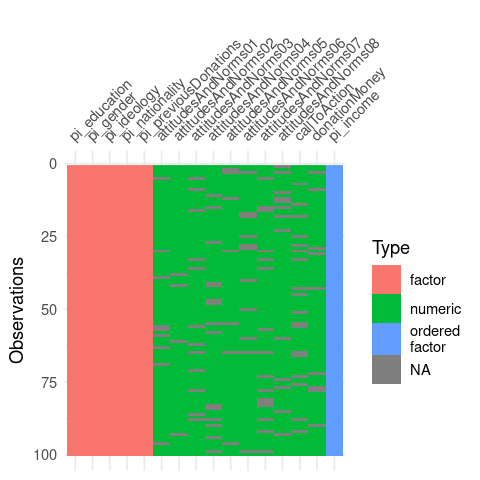

In [25]:
podaci_na %>%
# kako bismo odabrali posljednjih 5 stupaca,
# koristimo ncol za dobivanje broja stupaca te
# od vrijednosti koju dobijemo oduzimamo 5, a
# raspon protežemo do ncol. ovdje ncol vraća
# 66, pa efektivno imamo 61:65. oduzimanje od
# prvog poziva ncol mora biti u zagradama, inače
# error!
dplyr::select(1:10, (ncol(.)-5):ncol(.)) %>%
visdat::vis_dat(.)

Ovaj graf prikazuje svakog pojedinog sudionika na y-osi, te svaki pojedinu varijablu na x-osi. Različite boje označavaju tip varijable (`factor`, `numeric`...) te `NA`, odnosno missing. Dakle, gdje god je nešto sivo, tamo nedostaje vrijednost.

Funkcija `vis_miss` crta sličan graf, samo što ne označava tipove varijabli i govori nam koliki je postotak varijabli missing.

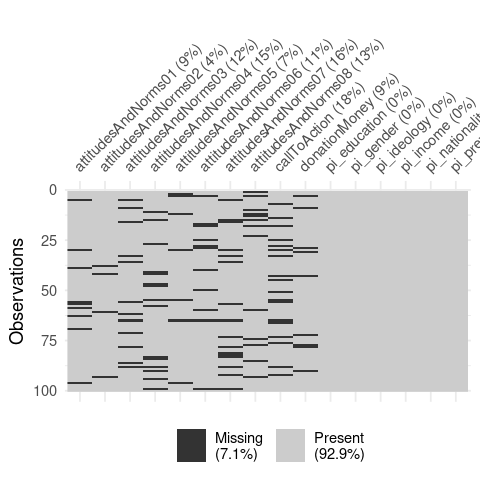

In [27]:
podaci_na %>%
dplyr::select(1:10, (ncol(.)-5):ncol(.)) %>%
visdat::vis_miss(.)

Još jedan grubi prikaz:

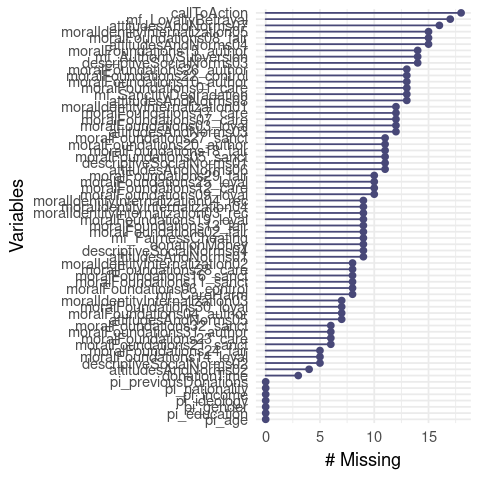

In [21]:
naniar::gg_miss_var(podaci_na)

Pomoću `n_miss` možemo dobiti broj vrijednosti koje nedostaju. Komplementarna funkcija je `n_complete`, koja, jel...

In [28]:
naniar::n_miss(podaci_na)
naniar::n_complete(podaci_na)

podaci_na %>%
{naniar::n_miss(.) + naniar::n_complete(.) ==
    nrow(.) * ncol(.)}

[1] 594

[1] 6006

[1] TRUE

Pomoću `miss_case_summary` možemo dobiti informaciju o tome koliko svaki pojedini sudionik ima missinga.

In [31]:
podaci_na %>%
# gledamo samo prvih 20
slice(1:20) %>%
naniar::miss_case_summary(.)

case,n_miss,pct_miss
13,12,18.181818
2,7,10.606061
3,7,10.606061
5,7,10.606061
12,7,10.606061
16,7,10.606061
18,7,10.606061
6,6,9.090909
9,6,9.090909
8,5,7.575758


Ove funkcije su zgodne za opći pregled. Ako želimo pobliže ispitati obrasce nedostajućih podataka, trebamo ući dublje u odnose među pojedinim varijablama. Prva funkcija koja nam ovdje uskače upomoć dolazi iz `naniara`.

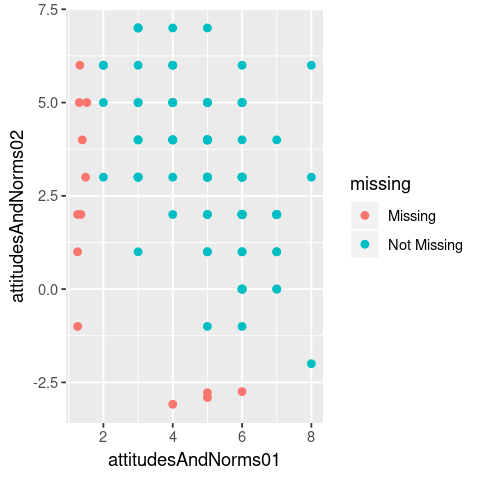

In [29]:
ggplot2::ggplot(podaci_na, aes(x = attitudesAndNorms01,
                     y = attitudesAndNorms02)) +
       naniar::geom_miss_point()

Točke označene kao `Missing` imaju vrijednost na osi (tj. varijabli) kojoj su priklonjene (tj. s kojom su paralelne), ali nemaju na varijabli na koju su okomite. 

`Missing` točke nalaze se ispod minimuma koji vrijednosti dosežu na skali na kojoj nemaju rezultat. Da bude jasnije:

In [18]:
podaci_na %>%
dplyr::select(., attitudesAndNorms01, attitudesAndNorms02) %>%
summary(.)

 attitudesAndNorms01 attitudesAndNorms02
 Min.   :2.000       Min.   :-2.000     
 1st Qu.:4.000       1st Qu.: 2.000     
 Median :5.000       Median : 3.000     
 Mean   :5.055       Mean   : 3.198     
 3rd Qu.:6.000       3rd Qu.: 5.000     
 Max.   :8.000       Max.   : 7.000     
 NA's   :9           NA's   :4          

Vidimo da je minimum na `attitudesAndNorms01` 2, a na `attitudesAndNorms02` -2. Missing vrijednosti na grafu se nalaze ispod tih vrijednosti.

`gg_miss_upset` daje nam prikaz obrasca povezanosti missing vrijednosti kroz varijable.

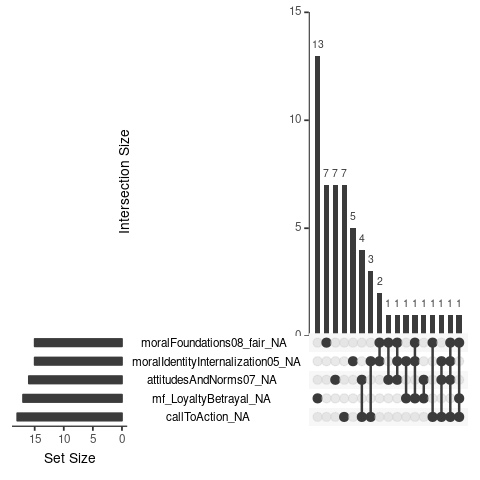

In [61]:
naniar::gg_miss_upset(podaci_na, nsets = 5, nintersect = 18)

Pomoću `nsets = 5` ograničili smo se na 5 najkritičnijih varijabli. Vidimo da broj missing vrijednosti (na grafu označeno kao `Set Size`) pada od `callToAction_NA` prema `moralFoundatoins08_NA`.

`nintersect` određuje koliko će *križanja* varijabli biti prikazano. Ova vrijednost trebala bi biti barem `nsets` + 1 da bi imala smisla.

Okomiti stupci pokazuju nam koliko je missing vrijednosti u pojedinom križanju (uključujući i "križanja" jedne varijable). Uzmimo `callToAction_NA`, koji ima 18 vrijednosti koje nedostaju, odnosno nema 18 vrijednosti. Kad zbrojimo sve okomite stupce u kojima ta varijabla ima točku, doći ćemo do broja 18.

Nekad je zgodno vidjeti razlikuju li se obrasci nedostajanja ovisno o nekoj kategoričkoj varijabli. U tu svrhu, možemo koristiti `gg_miss_fct`. Funkcija prima dva argumenta, neku tablicu s podacima i kategoričku varijablu na temelju koje treba prikazati obrazac vrijednosti koje nedostaju.

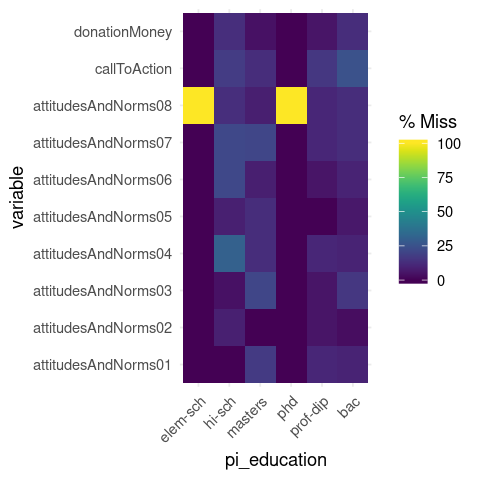

In [68]:
podaci_na %>%
dplyr::select(1:10, pi_education) %>%
naniar::gg_miss_fct(., fct = pi_education)

Ovdje, recimo, možemo vidjeti da nitko ili gotovo nitko tko je završio osnovnu školu ili doktorat nije odgovorio na osmo pitanje u `attitudesAndNorms08`, što nije pretjerano zabrinjavajuće jer su podaci simulirani, ali bi se u stvarnoj situaciji čovjek možda htio zapitati.

## Prtljanje po podacima iz SPSS-a za opće dobro

Kao što je na početku najavljeno, proći ćemo kroz R-ovsko prtljanje po korumpiranim podacima iz SPSS-a.

In [40]:
head(podaci_spss)

attitudesAndNorms01,attitudesAndNorms02,attitudesAndNorms03,attitudesAndNorms04,attitudesAndNorms05,attitudesAndNorms06,attitudesAndNorms07,attitudesAndNorms08,callToAction,charitableBehavior01,charitableBehavior02,descriptiveSocialNorms01,descriptiveSocialNorms02,descriptiveSocialNorms03,descriptiveSocialNorms04,mf_AuthoritySubversion,mf_CareHarm,mf_FairnessCheating,mf_LoyaltyBetrayal,mf_SanctityDegradation,moralFoundations01,moralFoundations02,moralFoundations03,moralFoundations04,moralFoundations05,moralFoundations06,moralFoundations07,moralFoundations08,moralFoundations09,moralFoundations10,moralFoundations11,moralFoundations12,moralFoundations13,moralFoundations14,moralFoundations15,moralFoundations16,moralFoundations17,moralFoundations18,moralFoundations19,moralFoundations20,moralFoundations21,moralFoundations22,moralFoundations23,moralFoundations24,moralFoundations25,moralFoundations26,moralFoundations27,moralFoundations28,moralFoundations29,moralFoundations30,moralFoundations31,moralFoundations32,moralIdentityInternalization01,moralIdentityInternalization02,moralIdentityInternalization03,moralIdentityInternalization04,moralIdentityInternalization05,pi_age,pi_education,pi_gender,pi_ideology,pi_income,pi_nationality,pi_previousDonations,V65
5,5,5,5,4,3,4,6,7,37,4,4,3,2,2,1,3,3,2,1,4,4,3,1,2,0,4,4,3,0,1,6,3,4,3,3,2,2,0,0,0,4,3,4,0,1,1,0,1,1,3,1,5,2,1,2,3,3,"""Some professional diploma","no degree""",Male,Neither liberal or conservative,Somewhat below the average,American,Rarely
5,4,2,1,2,2,3,7,6,18,3,3,1,3,1,1,3,3,2,1,3,3,0,0,2,0,3,3,3,-1,3,5,5,2,2,1,5,3,2,1,1,4,3,3,0,1,1,-1,1,1,2,0,4,3,1,3,4,20,Master's degree,Male,Very liberal (left),Somewhat above the average,USA,Regularly,
4,6,5,5,3,2,4,5,7,7,3,3,3,2,5,2,3,4,2,1,4,4,2,2,1,0,4,4,2,1,1,4,4,1,2,1,3,3,4,0,1,6,4,1,1,1,0,2,3,1,1,0,6,5,1,1,5,20,High school,Male,Neither liberal or conservative,Somewhat above the average,Turkish,Rarely,
6,2,3,2,2,3,5,6,1,14,5,1,1,2,3,2,3,3,3,1,3,3,1,2,3,2,4,3,4,3,0,5,5,1,1,2,4,4,2,4,1,4,2,5,2,5,1,-1,2,1,5,4,6,4,1,3,4,19,Master's degree,Male,Very liberal (left),Somewhat above the average,United States of America,Rarely,
4,1,2,3,1,2,4,5,8,0,0,3,1,2,4,2,4,2,2,1,3,1,1,2,3,-1,5,3,3,2,1,4,5,3,2,-1,4,5,2,1,3,4,4,2,0,0,1,-1,4,2,2,2,4,3,1,2,4,22,Master's degree,Female,Very liberal (left),Somewhat above the average,US,Regularly,
4,4,4,3,4,3,5,5,7,37,2,1,1,3,2,0,3,4,1,-1,4,4,0,0,-1,1,2,4,3,0,-1,4,3,3,3,1,4,2,2,3,3,3,0,3,3,2,1,1,1,1,2,1,4,6,1,1,4,25,Master's degree,Male,Very liberal (left),Somewhat above the average,USA,Regularly,


In [50]:
ekstraktati te redove vanka, modificirati ih i onda nalijepiti nazad

[1] "Some professional diploma no degree"
  [2] "Master's degree"                    
  [3] "High school"                        
  [4] "Master's degree"                    
  [5] "Master's degree"                    
  [6] "Master's degree"                    
  [7] "Some professional diploma no degree"
  [8] "Master's degree"                    
  [9] "The baccalaureate"                  
 [10] "Some professional diploma no degree"
 [11] "The baccalaureate"                  
 [12] "The baccalaureate"                  
 [13] "Elementary School"                  
 [14] "Some professional diploma no degree"
 [15] "High school"                        
 [16] "The baccalaureate"                  
 [17] "High school"                        
 [18] "The baccalaureate"                  
 [19] "Some professional diploma no degree"
 [20] "High school"                        
 [21] "The baccalaureate"                  
 [22] "The baccalaureate"                  
 [23] "The baccalaureate"                  
 [24] "Master's degree"                    
 [25] "The baccalaureate"                  
 [26] "The baccalaureate"                  
 [27] "Master's degree"                    
 [28] "High school"                        
 [29] "High school"                        
 [30] "The baccalaureate"                  
 [31] "The baccalaureate"                  
 [32] "High school"                        
 [33] "The baccalaureate"                  
 [34] "Master's degree"                    
 [35] "Some professional diploma no degree"
 [36] "Master's degree"                    
 [37] "High school"                        
 [38] "Some professional diploma no degree"
 [39] "The baccalaureate"                  
 [40] "Some professional diploma no degree"
 [41] "Master's degree"                    
 [42] "High school"                        
 [43] "The baccalaureate"                  
 [44] "The baccalaureate"                  
 [45] "The baccalaureate"                  
 [46] "Master's degree"                    
 [47] "Some professional diploma no degree"
 [48] "High school"                        
 [49] "Master's degree"                    
 [50] "The baccalaureate"                  
 [51] "Master's degree"                    
 [52] "High school"                        
 [53] "High school"                        
 [54] "Some professional diploma no degree"
 [55] "High school"                        
 [56] "Master's degree"                    
 [57] "Master's degree"                    
 [58] "High school"                        
 [59] "Some professional diploma no degree"
 [60] "Master's degree"                    
 [61] "The baccalaureate"                  
 [62] "Master's degree"                    
 [63] "Some professional diploma no degree"
 [64] "The baccalaureate"                  
 [65] "Master's degree"                    
 [66] "The baccalaureate"                  
 [67] "The baccalaureate"                  
 [68] "High school"                        
 [69] "The baccalaureate"                  
 [70] "The baccalaureate"                  
 [71] "The baccalaureate"                  
 [72] "Some professional diploma no degree"
 [73] "High school"                        
 [74] "The baccalaureate"                  
 [75] "Some professional diploma no degree"
 [76] "High school"                        
 [77] "Master's degree"                    
 [78] "High school"                        
 [79] "The baccalaureate"                  
 [80] "Some professional diploma no degree"
 [81] "High school"                        
 [82] "Master's degree"                    
 [83] "Some professional diploma no degree"
 [84] "Master's degree"                    
 [85] "PhD or higher"                      
 [86] "Some professional diploma no degree"
 [87] "High school"                        
 [88] "The baccalaureate"                  
 [89] "Master's degree"                    
 [90] "The baccalaureate"                  
 [91] "Some professional diploma no degree

## Reference i dodatna literatura.

[Grolemund, G. i Wickham, H. *R for data science*. O'Reilly Media, Inc.](https://r4ds.had.co.nz/)

[Michael Crawley (2012). *The R Book*.](https://www.cs.upc.edu/~robert/teaching/estadistica/TheRBook.pdf)

Pipe
- https://cran.r-project.org/web/packages/magrittr/vignettes/magrittr.html
- http://r4ds.had.co.nz/pipes.html

Regularni izrazi
- [jako dobar šalabahter](https://remram44.github.io/regex-cheatsheet/regex.html)
- [još jedan](http://www.rexegg.com/regex-quickstart.html)
- [stranica koja omogućuje isprobavanje različitih uzoraka na tekstu](https://regexr.com/)
- [uvod u `stringr`](https://cran.r-project.org/web/packages/stringr/vignettes/stringr.html)

Data wrangling (dplyr i srodno):
- [prvi od četiri dijela (linkovi na druge na dnu stranice) blogova o formatiranju podataka](https://suzanbaert.netlify.com/2018/01/dplyr-tutorial-1/)

Korisni savjeti za organizaciju podataka u tablicama
- Broman, K. W., & Woo, K. H. (2018). Data organization in spreadsheets. *The American Statistician, 72*(1), 2–10.

`naniar`:
- [intro](https://cran.r-project.org/web/packages/naniar/vignettes/getting-started-w-naniar.html)
- [galerija vizualizacija](https://cran.r-project.org/web/packages/naniar/vignettes/naniar-visualisation.html)

Šalabahteri (obavezno skinuti!)
- [obavezno!](https://www.rstudio.com/resources/cheatsheets/)

Pretvaranje `.sav` fileova u `.csv`
- https://pspp.benpfaff.org/

## Epilog

In [ ]:
sessionInfo() 